## Importing Libraries

In [1073]:
import pandas as pd
import numpy as np
import seaborn as sns
import pylab
import scipy.stats as stats
import statsmodels.api as sm
import matplotlib.pyplot as plt

from sklearn.impute import SimpleImputer

## Constant Declaration

In [1074]:
class FeatureCategory:
    CATEGORICAL = 1
    NUMERICAL = 2
    ORDINAL = 3

num_features = ['LotFrontage', 'LotArea', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', \
                'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', \
                 '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', \
                 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', \
                 'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', \
                 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', \
                 'MiscVal', 'MoSold', 'YrSold']

cat_features = ['MSZoning', 'Street', 'Alley', \
                'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', \
                'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', \
                'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', \
                'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', \
                'BsmtExposure','BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', \
                'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'FireplaceQu', \
                'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', \
                'PoolQC', 'Fence', 'MiscFeature', 'SaleType', 'SaleCondition' ]

ord_features = ['MSSubClass', 'OverallQual', 'OverallCond' ]


## Classes

In [1075]:
class FeatureAnalysis:
    
    def analyse_missing_features(self, df, feature_list, to_impute):
        if (to_impute):
            return df[feature_list] \
                    .isnull().mean() \
                    .loc[lambda x : x > 0] \
                    .sort_values(ascending=False)
        else:
            return df[feature_list] \
                    .isnull().mean() \
                    .loc[lambda x : x == 0] \
                    .sort_values(ascending=False)
            
            
    
    def unique_values(self, df, feature_name):
        feature_values = df[feature_name].unique()
        feature_values.sort()
        return feature_values
    
    def draw_feature_plots(self, df, feature_name, target_name, is_categorical):
        feature = df[feature_name]
        fig, axs = plt.subplots(2, 2)
        fig.suptitle(f'"{feature_name}" feature analysis')

        axs[0, 0].hist(feature)
        
        if (is_categorical == False):
            axs[0, 1].boxplot(feature)
    
        stats.probplot(df[feature_name], dist='norm', plot=axs[1, 0])
        
        if (not (target_name == '')):
            axs[1, 1].scatter(feature, df[target_name])

        plt.show()
    

## Loading training and testing sets

In [1076]:
train_df = pd.read_csv('../datasets/house_prices/train.csv')
train_df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [1077]:
test_df = pd.read_csv('../datasets/house_prices/test.csv')
test_df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [1078]:
print('Number of FEATURES = ' + str(len(num_features) + len(cat_features) + len(ord_features)))
print('Number of ROWS = ' + str(len(train_df)))
print('Number of the NUMERICAL features = ' + str(len(num_features)))
print('Number of the CATEGORICAL features = ' + str(len(cat_features)))
print('Number of the ORDINAL features = ' + str(len(ord_features)))
print('All FEATURES = ' + str(train_df.columns.values))

Number of FEATURES = 79
Number of ROWS = 1460
Number of the NUMERICAL features = 33
Number of the CATEGORICAL features = 43
Number of the ORDINAL features = 3
All FEATURES = ['Id' 'MSSubClass' 'MSZoning' 'LotFrontage' 'LotArea' 'Street' 'Alley'
 'LotShape' 'LandContour' 'Utilities' 'LotConfig' 'LandSlope'
 'Neighborhood' 'Condition1' 'Condition2' 'BldgType' 'HouseStyle'
 'OverallQual' 'OverallCond' 'YearBuilt' 'YearRemodAdd' 'RoofStyle'
 'RoofMatl' 'Exterior1st' 'Exterior2nd' 'MasVnrType' 'MasVnrArea'
 'ExterQual' 'ExterCond' 'Foundation' 'BsmtQual' 'BsmtCond' 'BsmtExposure'
 'BsmtFinType1' 'BsmtFinSF1' 'BsmtFinType2' 'BsmtFinSF2' 'BsmtUnfSF'
 'TotalBsmtSF' 'Heating' 'HeatingQC' 'CentralAir' 'Electrical' '1stFlrSF'
 '2ndFlrSF' 'LowQualFinSF' 'GrLivArea' 'BsmtFullBath' 'BsmtHalfBath'
 'FullBath' 'HalfBath' 'BedroomAbvGr' 'KitchenAbvGr' 'KitchenQual'
 'TotRmsAbvGrd' 'Functional' 'Fireplaces' 'FireplaceQu' 'GarageType'
 'GarageYrBlt' 'GarageFinish' 'GarageCars' 'GarageArea' 'GarageQual'
 

In [1079]:
fa = FeatureAnalysis()

## Feature imputation

In [1080]:
imputed_features = []
imputed_train_df = pd.DataFrame()
median_imputer = SimpleImputer(missing_values=np.nan, strategy='median')
frequent_cat_imputer = SimpleImputer(missing_values=np.NaN, strategy='most_frequent')

In [1081]:
num_features_to_impute = fa.analyse_missing_features(train_df, num_features, True)
num_features_no_impute = fa.analyse_missing_features(train_df, num_features, False)

imputed_train_df = pd.concat([imputed_train_df, train_df[num_features_no_impute.index]])
imputed_features = imputed_features + num_features_no_impute.index.values.tolist()

print(f'Number of impute features is: {len(imputed_features)}')
num_features_to_impute

Number of impute features is: 30


LotFrontage    0.177397
GarageYrBlt    0.055479
MasVnrArea     0.005479
dtype: float64

In [1082]:
len(imputed_train_df)

1460

In [1083]:
median_imputer.fit(train_df[num_features_to_impute.index])
num_features_imputed = median_imputer.transform(train_df[num_features_to_impute.index])
num_features_imputed_df = pd.DataFrame(num_features_imputed, columns=num_features_to_impute.index)

for column in num_features_imputed_df.columns:
    imputed_train_df[column] = num_features_imputed_df[column]
    
#print(str(len(imputed_train_df.columns)))
imputed_train_df.head()

,LotArea,YearBuilt,MoSold,MiscVal,PoolArea,ScreenPorch,3SsnPorch,EnclosedPorch,OpenPorchSF,WoodDeckSF,...,1stFlrSF,TotalBsmtSF,BsmtUnfSF,BsmtFinSF2,BsmtFinSF1,YearRemodAdd,YrSold,LotFrontage,GarageYrBlt,MasVnrArea
0,8450,2003,2,0,0,0,0,0,61,0,...,856,856,150,0,706,2003,2008,65.0,2003.0,196.0
1,9600,1976,5,0,0,0,0,0,0,298,...,1262,1262,284,0,978,1976,2007,80.0,1976.0,0.0
2,11250,2001,9,0,0,0,0,0,42,0,...,920,920,434,0,486,2002,2008,68.0,2001.0,162.0
3,9550,1915,2,0,0,0,0,272,35,0,...,961,756,540,0,216,1970,2006,60.0,1998.0,0.0
4,14260,2000,12,0,0,0,0,0,84,192,...,1145,1145,490,0,655,2000,2008,84.0,2000.0,350.0


In [1084]:
 imputed_features = imputed_features + num_features_to_impute.index.values.tolist()
num_features_to_impute = fa.analyse_missing_features(imputed_train_df, num_features, True)

if(len(num_features_to_impute) == 0):
    print('All numberical features were imputed successfully')
else:
    print('Warning ! Not all numberical features were imputed')
    
print(f'Number of impute features is: {len(imputed_features)}')

All numberical features were imputed successfully
Number of impute features is: 33


In [1085]:
cat_features_no_impute = fa.analyse_missing_features(train_df, cat_features, False)
cat_features_no_impute.index

Index(['MSZoning', 'Exterior1st', 'SaleType', 'PavedDrive', 'Functional',
       'KitchenQual', 'CentralAir', 'HeatingQC', 'Heating', 'Foundation',
       'ExterCond', 'ExterQual', 'Exterior2nd', 'RoofMatl', 'Street',
       'RoofStyle', 'HouseStyle', 'BldgType', 'Condition2', 'Condition1',
       'Neighborhood', 'LandSlope', 'LotConfig', 'Utilities', 'LandContour',
       'LotShape', 'SaleCondition'],
      dtype='object')

In [1086]:
#Printing all categorical features to impute
cat_features_to_impute = fa.analyse_missing_features(train_df, cat_features, True)

cat_features_no_impute = fa.analyse_missing_features(train_df, cat_features, False)

for feature_name in cat_features_no_impute.index:
    imputed_train_df[feature_name] = train_df[feature_name]

cat_features_to_impute

PoolQC          0.995205
MiscFeature     0.963014
Alley           0.937671
Fence           0.807534
FireplaceQu     0.472603
GarageType      0.055479
GarageFinish    0.055479
GarageQual      0.055479
GarageCond      0.055479
BsmtExposure    0.026027
BsmtFinType2    0.026027
BsmtQual        0.025342
BsmtCond        0.025342
BsmtFinType1    0.025342
MasVnrType      0.005479
Electrical      0.000685
dtype: float64

In [1087]:
#Dropping features such that missing value percent is greater than 20%
not_imputable_cat_features = cat_features_to_impute.loc[lambda x : x >= 0.1]
cat_features_to_impute = cat_features_to_impute.loc[lambda x : x < 0.1]

print(f'Number of the not imputable feature is {len(not_imputable_cat_features)}')

cat_features_to_impute

Number of the not imputable feature is 5


GarageType      0.055479
GarageFinish    0.055479
GarageQual      0.055479
GarageCond      0.055479
BsmtExposure    0.026027
BsmtFinType2    0.026027
BsmtQual        0.025342
BsmtCond        0.025342
BsmtFinType1    0.025342
MasVnrType      0.005479
Electrical      0.000685
dtype: float64

In [1088]:
for feature_name in cat_features_to_impute.index:
    
    most_frequent_category = train_df[feature_name].mode()
    imputed_train_df[feature_name] = train_df[feature_name]
    imputed_train_df[imputed_train_df[feature_name].isnull()] = most_frequent_category[0]
    

In [1089]:
cat_features_to_impute = fa.analyse_missing_features(imputed_train_df, cat_features_to_impute.index, True)

if(len(cat_features_to_impute) == 0):
    print('All categorical features were imputed successfully')
else:
    print('Warning ! Not all categorical features were imputed')


All categorical features were imputed successfully


In [1090]:
print('Listing not imputable categorical features')
not_imputable_cat_feature_list = not_imputable_cat_features.index.values.tolist()


Listing not imputable categorical features


In [1091]:
imputed_cat_features = []

for feature_name in cat_features:
    if(not (feature_name in not_imputable_cat_feature_list)):
        imputed_cat_features.append(feature_name)

    
imputed_features = imputed_features + imputed_cat_features
print(f'Number of impute features is: {len(imputed_features)}')

Number of impute features is: 71


In [1092]:
ord_features_to_impute = fa.analyse_missing_features(train_df, ord_features, True)
ord_features_no_impute = fa.analyse_missing_features(train_df, ord_features, False)

if (len(ord_features_to_impute) == 0):
    print('No missing values were found for the ordinal features')

No missing values were found for the ordinal features


In [1093]:
# Ordinal features do not have missing values
# Adding all ordinal features to the imputed dataframe

for feature_name in ord_features_no_impute.index:
    imputed_train_df[feature_name] = train_df[feature_name]
    
imputed_features = imputed_features + ord_features_no_impute.index.values.tolist()
print(f'Number of impute features is: {len(imputed_features)}')

Number of impute features is: 74


In [1094]:
imputed_train_df.columns

Index(['LotArea', 'YearBuilt', 'MoSold', 'MiscVal', 'PoolArea', 'ScreenPorch',
       '3SsnPorch', 'EnclosedPorch', 'OpenPorchSF', 'WoodDeckSF', 'GarageArea',
       'GarageCars', 'Fireplaces', 'TotRmsAbvGrd', 'KitchenAbvGr',
       'BedroomAbvGr', 'HalfBath', 'FullBath', 'BsmtHalfBath', 'BsmtFullBath',
       'GrLivArea', 'LowQualFinSF', '2ndFlrSF', '1stFlrSF', 'TotalBsmtSF',
       'BsmtUnfSF', 'BsmtFinSF2', 'BsmtFinSF1', 'YearRemodAdd', 'YrSold',
       'LotFrontage', 'GarageYrBlt', 'MasVnrArea', 'MSZoning', 'Exterior1st',
       'SaleType', 'PavedDrive', 'Functional', 'KitchenQual', 'CentralAir',
       'HeatingQC', 'Heating', 'Foundation', 'ExterCond', 'ExterQual',
       'Exterior2nd', 'RoofMatl', 'Street', 'RoofStyle', 'HouseStyle',
       'BldgType', 'Condition2', 'Condition1', 'Neighborhood', 'LandSlope',
       'LotConfig', 'Utilities', 'LandContour', 'LotShape', 'SaleCondition',
       'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond',
       'BsmtExposure', 'BsmtFinT

Text(0.5, 1.0, 'GarageType')

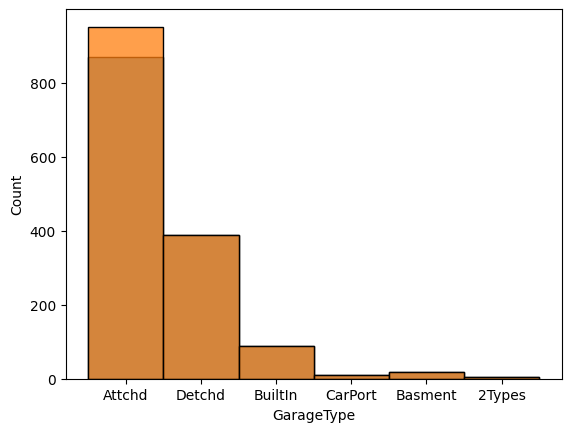

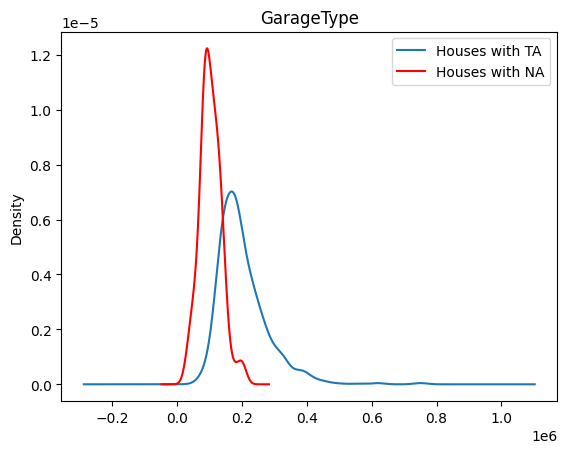

In [1095]:
#fa.draw_feature_plots(train_df, 'MasVnrArea', 'SalePrice', False)
#stats.probplot(train_df['MSSubClass'], dist='norm', plot=plt)
#plt.show()

sns.histplot(train_df['GarageType'])
#x = fa.unique_values(train_df, 'Exterior1st')
#x.size

most_frequent_category = train_df['GarageType'].mode()
category_percent = (train_df.groupby('GarageType')['GarageType'].count() / len(train_df)).sort_values(ascending=False)
category_percent

temp_df = pd.DataFrame()
temp_df['GarageType'] = train_df['GarageType']

temp_df[temp_df['GarageType'].isnull()] = most_frequent_category

sns.histplot(temp_df['GarageType'])

temp_df['GarageType'].isnull().mean()


fig = plt.figure()
ax = fig.add_subplot(111)
# select and plot houses with the most frequent label
train_df[train_df['GarageType'] == 'Attchd']['SalePrice'].plot(kind='kde', ax=ax)
# select and plot houses with missing data in the variable
train_df[train_df['GarageType'].isnull()]['SalePrice'].plot(kind='kde', ax=ax, color='red')
# add the legend
lines, labels = ax.get_legend_handles_labels()
labels = ['Houses with TA', 'Houses with NA']
ax.legend(lines, labels, loc='best')
# add figure title
plt.title('GarageType')